# What are the most important internal and external features in predicting rental prices? 

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from statsmodels.formula.api import ols, glm, wls
from statsmodels.api import families
from numpy import log
import numpy as np


df = pd.read_csv('../data/curated/engineered-data.csv')


In [113]:
selected_property_types = ['Townhouse', 'House', 'Apartment', 'Unit']
df.loc[:, 'propertyType'] = df['propertyType'].apply(lambda t: t if t in selected_property_types else 'Other')

previous_size = len(df)
df = df[df['propertyType'] != 'Other']
print(f'{previous_size-len(df)}/{previous_size} ({(previous_size-len(df))/previous_size*100:.0f}%) of properties of type not in {selected_property_types} removed.')

270/10421 (3%) of properties of type not in ['Townhouse', 'House', 'Apartment', 'Unit'] removed.


In [114]:
df.head(20)

,suburb,postcode,price,propertyType,bedrooms,bathrooms,parkingSpaces,studies,furnished,closest_primary_distance,...,min_sec_icsea,log_closest_park_distance,log_closest_tram_distance,log_closest_train_distance,park_walkability,is_primary_school_walkable,is_secondary_school_walkable,is_tram_stop_walkable,is_train_station_walkable,city
0,Melbourne,3000,560,Apartment,2,1,0,0,N,821.8,...,1127.0,7.251841,6.533934,6.820126,$<$1.5 km,$<$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,True
1,Melbourne,3000,580,Apartment,2,1,0,0,Y,1690.6,...,1138.0,7.831419,5.428029,7.311753,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,True
2,Melbourne,3000,450,Apartment,1,1,0,0,N,786.9,...,1127.0,7.256297,5.473111,6.865683,$<$1.5 km,$<$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,True
3,Melbourne,3000,550,Apartment,2,2,1,0,N,2026.9,...,1138.0,7.697757,6.197869,7.401475,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,1.5-5km,True
4,Melbourne,3000,600,Apartment,2,1,0,0,Y,1690.6,...,1138.0,7.831419,5.428029,7.311753,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,True
5,Melbourne,3000,650,Apartment,2,2,1,0,N,1778.6,...,1138.0,7.865764,5.754476,6.996864,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,True
6,Melbourne,3000,465,Apartment,1,1,0,0,Y,1846.4,...,1138.0,7.673921,6.068657,7.342520,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,1.5-5km,True
7,Melbourne,3000,500,Apartment,1,1,0,0,N,1430.8,...,1138.0,7.054363,6.388729,6.313729,$<$1.5 km,$<$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,True
8,Melbourne,3000,590,Apartment,2,1,0,0,Y,1729.2,...,1127.0,7.793793,6.619540,6.044768,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,True
9,Melbourne,3000,360,Apartment,2,1,0,0,Y,2144.8,...,1138.0,7.597145,5.736895,6.252097,1.5-5km,$>$1.5km,$>$1.5km,$<$1.5 km,$<$1.5 km,True


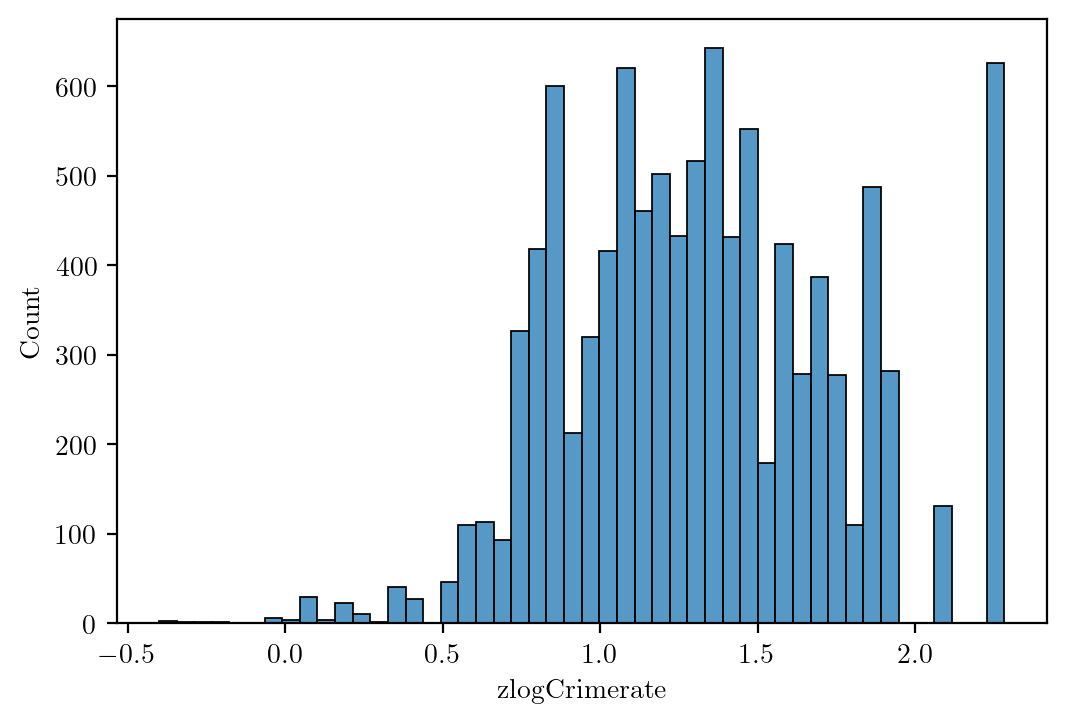

In [115]:
sns.histplot(data=df, x='zlogCrimerate', log_scale=False)
plt.savefig('../plots/crime-rate.png')

In [116]:
df.corr()

,postcode,price,bedrooms,bathrooms,parkingSpaces,studies,closest_primary_distance,closest_secondary_distance,closest_train_distance,closest_tram_distance,...,cbd_duration,zlogCrimerate,closest_bus_distance,closest_park_distance,min_pri_icsea,min_sec_icsea,log_closest_park_distance,log_closest_tram_distance,log_closest_train_distance,city
postcode,1.000000,0.048909,0.086976,0.054443,0.116186,-0.004804,-0.005807,0.012858,0.040030,0.066467,...,0.374757,-0.291318,0.012984,0.024591,0.001499,-0.041165,0.035810,0.113934,0.054153,-0.332996
price,0.048909,1.000000,0.396133,0.475359,0.189872,0.135581,-0.033372,-0.058048,-0.098448,-0.204043,...,-0.188507,-0.107526,0.011414,-0.186788,0.281954,0.275127,-0.184970,-0.191230,-0.104201,0.103786
bedrooms,0.086976,0.396133,1.000000,0.558077,0.537645,0.068547,0.082508,0.180192,0.378586,0.394439,...,0.462523,-0.108147,0.076438,0.232287,-0.232151,-0.251883,0.207877,0.435243,0.375528,-0.270990
bathrooms,0.054443,0.475359,0.558077,1.000000,0.332462,0.125295,0.106073,0.110086,0.252233,0.215665,...,0.223585,-0.052292,0.079630,0.079798,-0.032546,-0.024653,0.055421,0.212551,0.224359,-0.085960
parkingSpaces,0.116186,0.189872,0.537645,0.332462,1.000000,0.071838,0.039107,0.128518,0.276728,0.317212,...,0.441394,-0.164873,0.028470,0.216799,-0.220008,-0.279341,0.207314,0.378006,0.313349,-0.346099
studies,-0.004804,0.135581,0.068547,0.125295,0.071838,1.000000,0.022078,0.008500,0.036678,0.006869,...,-0.003214,-0.010876,0.010926,0.000655,0.020482,0.037709,-0.005237,-0.008462,0.026703,0.029098
closest_primary_distance,-0.005807,-0.033372,0.082508,0.106073,0.039107,0.022078,1.000000,0.384022,0.396756,0.222638,...,0.119696,0.093938,0.328834,0.084104,-0.048053,0.027712,0.057017,0.141688,0.232329,0.053615
closest_secondary_distance,0.012858,-0.058048,0.180192,0.110086,0.128518,0.008500,0.384022,1.000000,0.495901,0.307681,...,0.269679,-0.040220,0.249897,0.127800,-0.105171,-0.121468,0.082132,0.269322,0.301396,-0.040882
closest_train_distance,0.040030,-0.098448,0.378586,0.252233,0.276728,0.036678,0.396756,0.495901,1.000000,0.547493,...,0.461736,-0.024929,0.325975,0.220366,-0.289244,-0.240022,0.151859,0.450849,0.796738,-0.186836
closest_tram_distance,0.066467,-0.204043,0.394439,0.215665,0.317212,0.006869,0.222638,0.307681,0.547493,1.000000,...,0.785640,0.163939,0.158438,0.257890,-0.559700,-0.530349,0.194786,0.791215,0.456234,-0.230210


<AxesSubplot:xlabel='closest_primary_distance', ylabel='Count'>

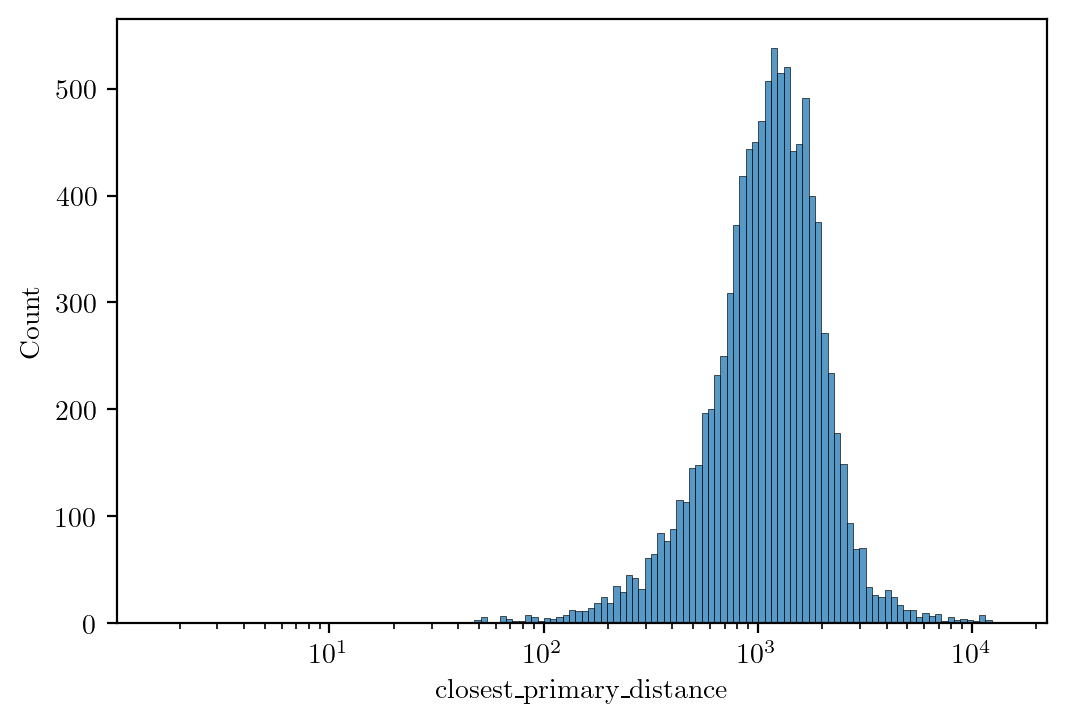

In [117]:
sns.histplot(df, x='closest_primary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_park_distance', ylabel='Count'>

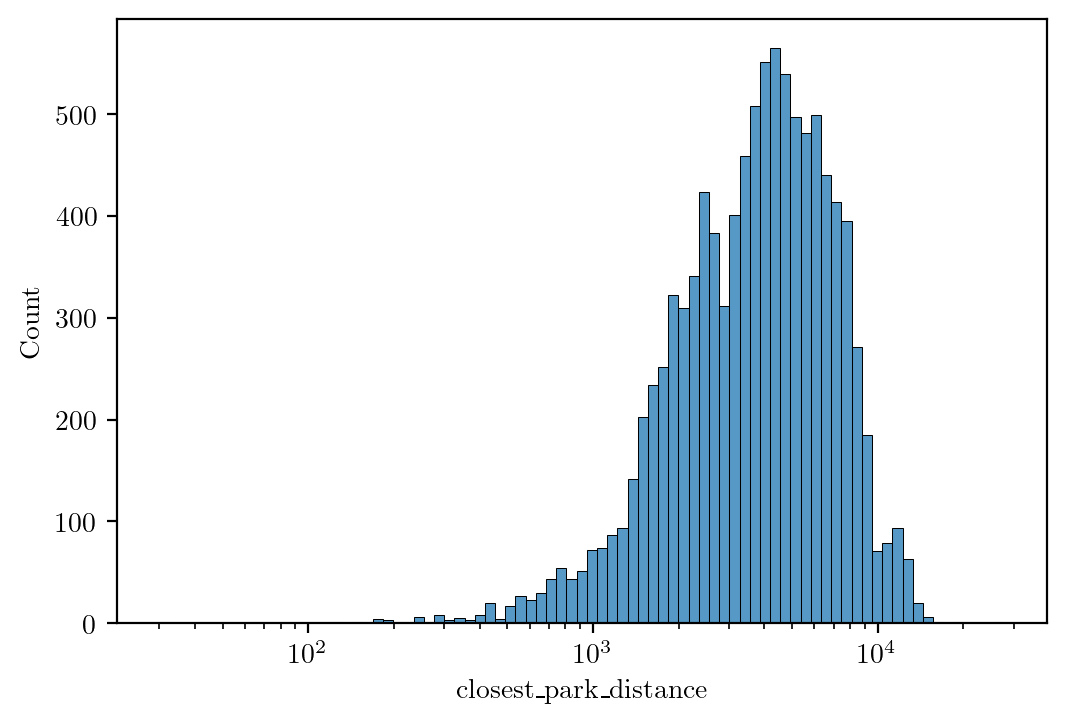

In [118]:
sns.histplot(df, x='closest_park_distance', log_scale=True)

<AxesSubplot:xlabel='closest_secondary_distance', ylabel='Count'>

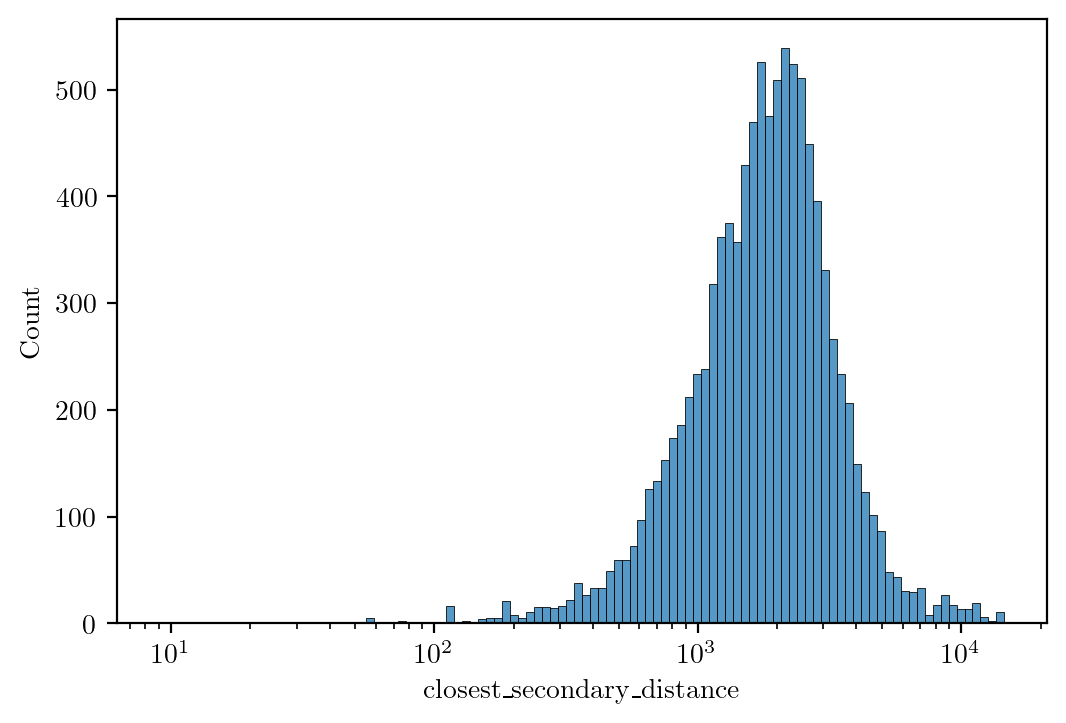

In [119]:
sns.histplot(df, x='closest_secondary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_tram_distance', ylabel='Count'>

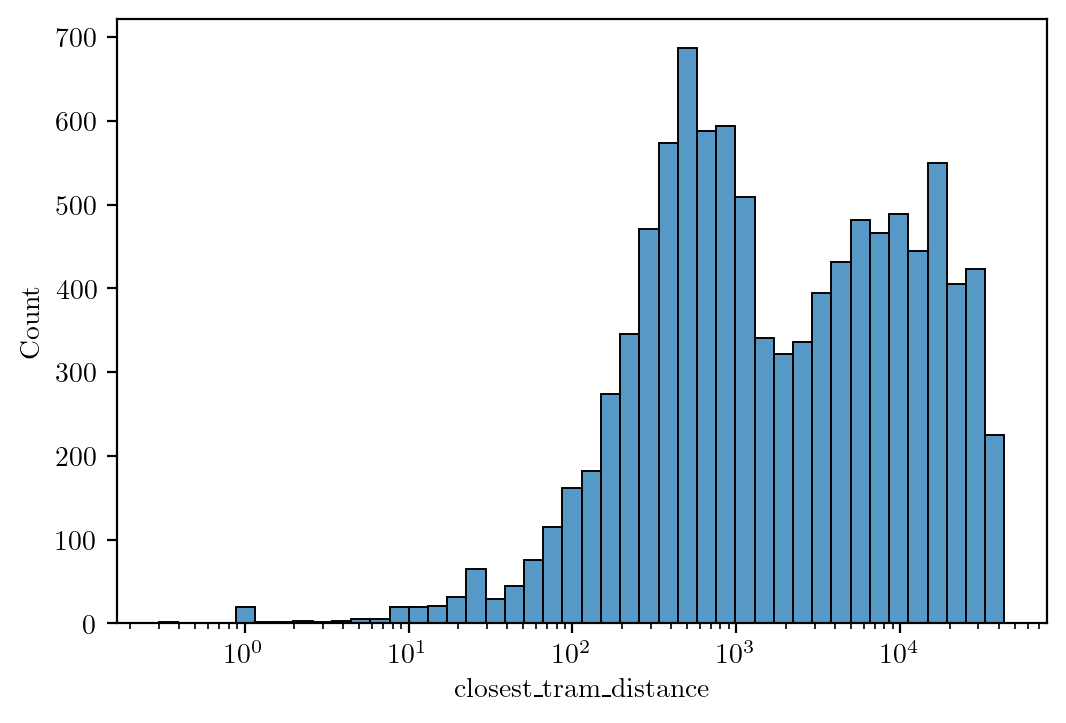

In [120]:
sns.histplot(df, x='closest_tram_distance', log_scale=True)

In [121]:
df.loc[:, 'bedrooms'] = df['bedrooms'].apply(lambda p: 1 if p in {0, 1} else p if p < 4 else '4+')
df.loc[:, 'parkingSpaces'] = df['parkingSpaces'].apply(lambda p: p if p < 3 else '3+')
df.loc[:, 'bathrooms'] = df['bathrooms'].apply(lambda p: p if p < 3 else '3+')


In [122]:
rcParams['figure.dpi'] = 200

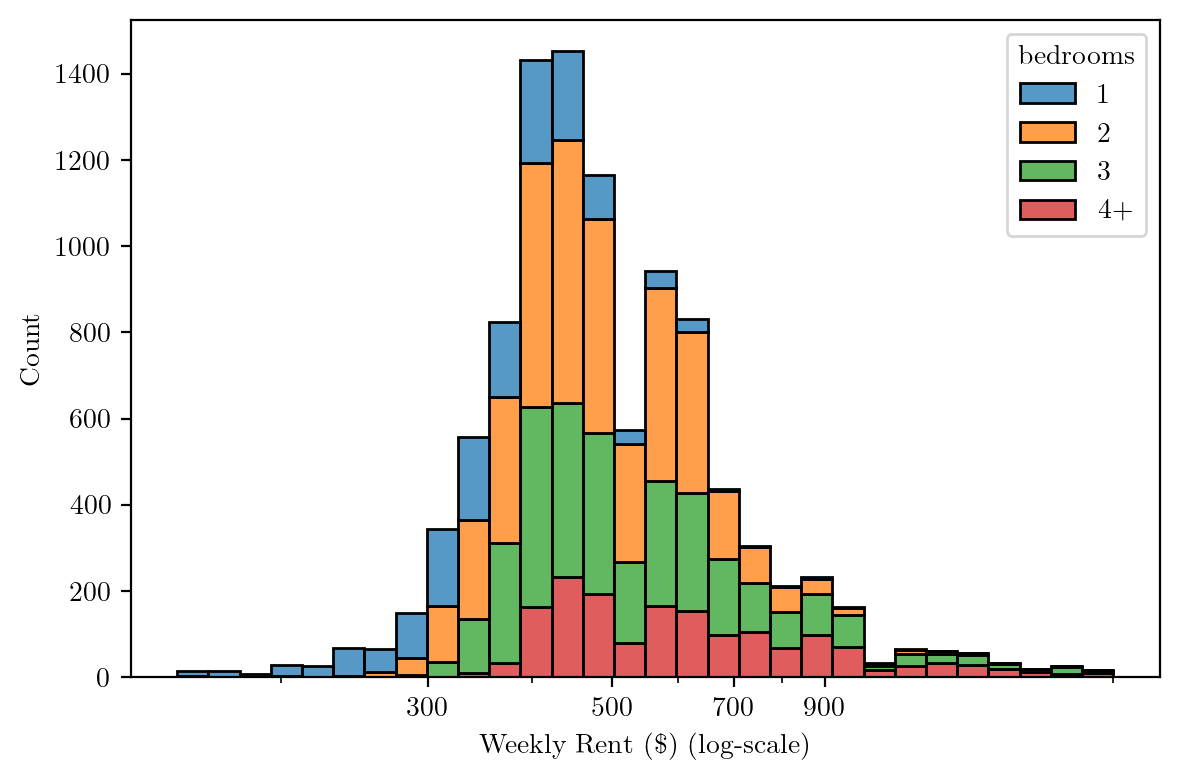

In [123]:
sns.histplot(df, x='price', hue='bedrooms', log_scale=True, multiple='stack', hue_order=[1, 2, 3, '4+'], bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bedrooms.png')

* More bedrooms -> more rent

Text(0.5, 0, 'Weekly Rent (\\$)')

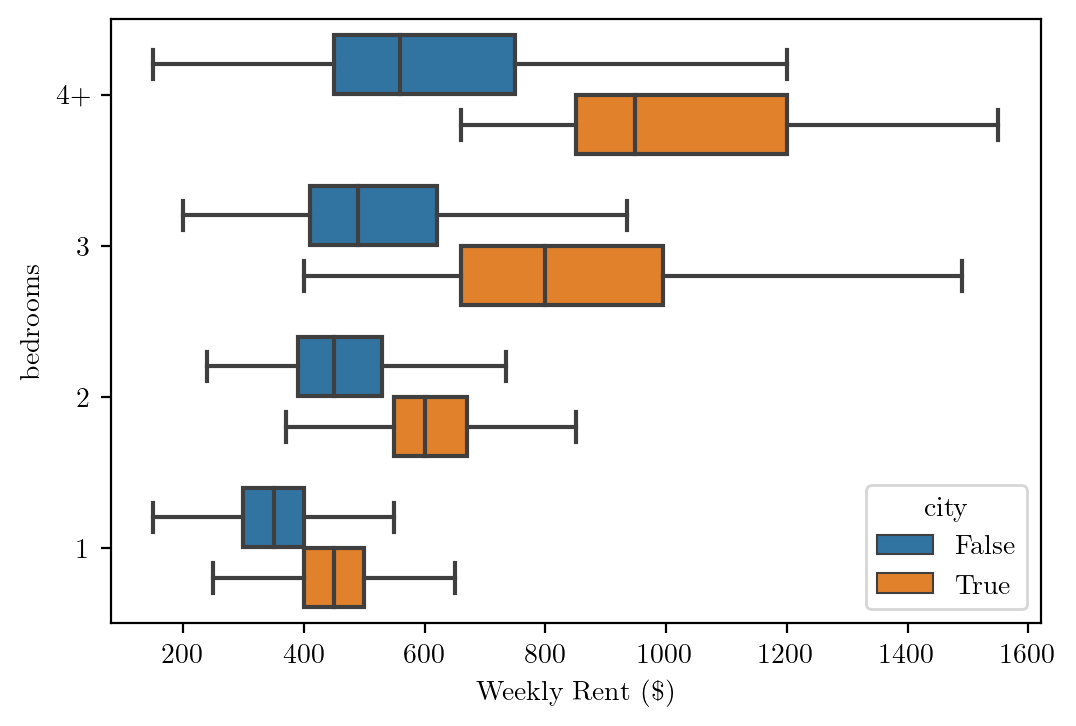

In [124]:
sns.boxplot(data=df, x='price', y='bedrooms', showfliers=False, hue='city', order=[1,2,3,'4+'][::-1])
plt.xlabel(r'Weekly Rent (\$)')

* Being in the city increases the effect of having more bedrooms on property rents

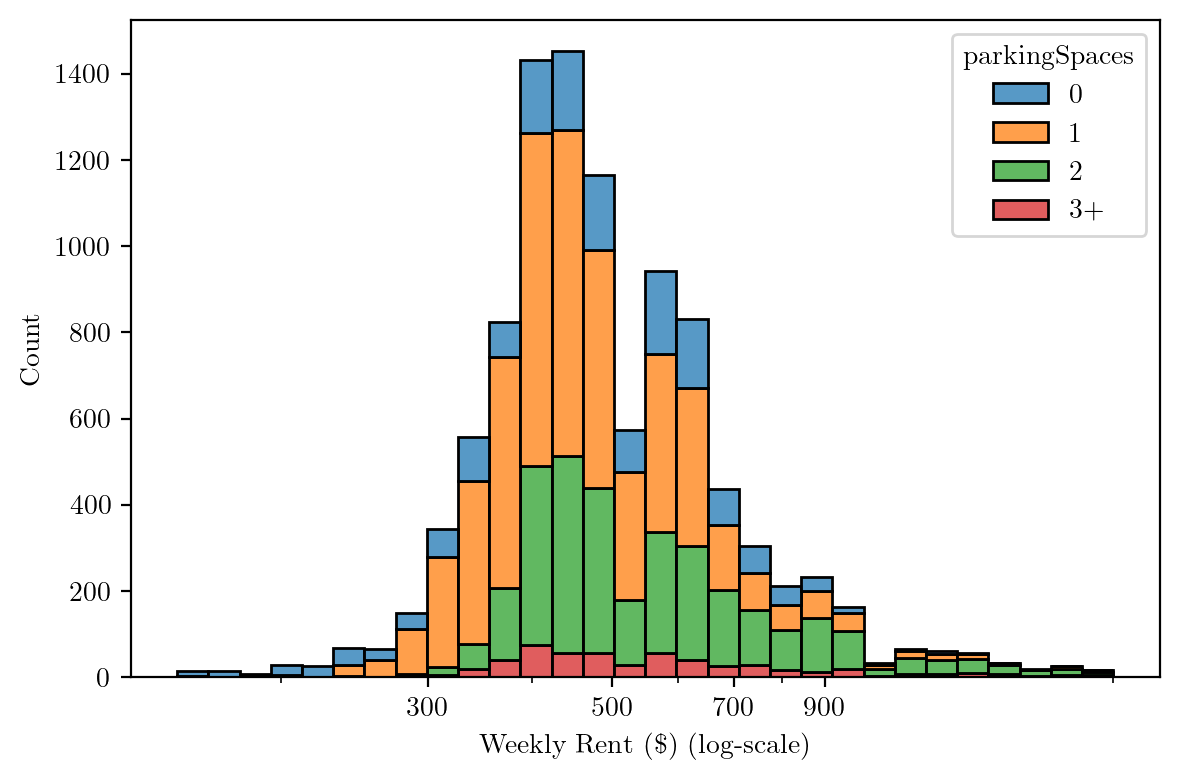

In [125]:
sns.histplot(df, x='price', hue='parkingSpaces', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-parking.png')

* Properties less than $300 almost never have more than 1 parking space
* It is rare for a property to have more than 2 parking spaces, when it does, it doesn't seem to impact the rent

Text(0.5, 0, 'Weekly Rent (\\$)')

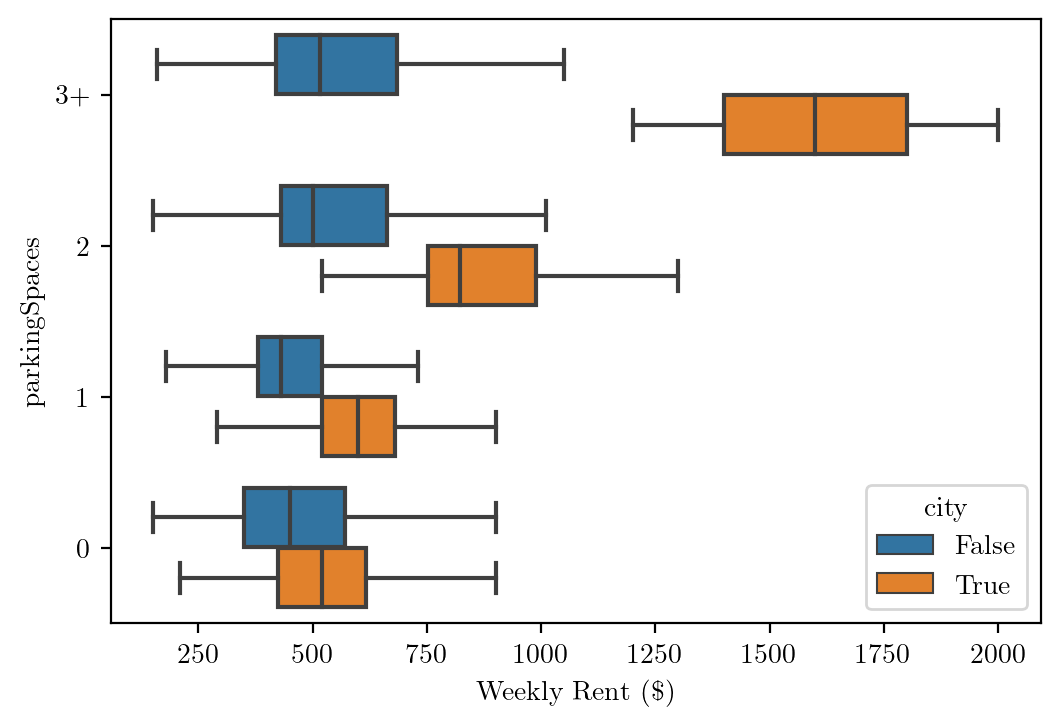

In [126]:
sns.boxplot(data=df, x='price', y='parkingSpaces', showfliers=False, hue='city', order=[0,1,2,'3+'][::-1])
plt.xlabel(r'Weekly Rent (\$)')

* City parking spaces are worth more than subruban ones

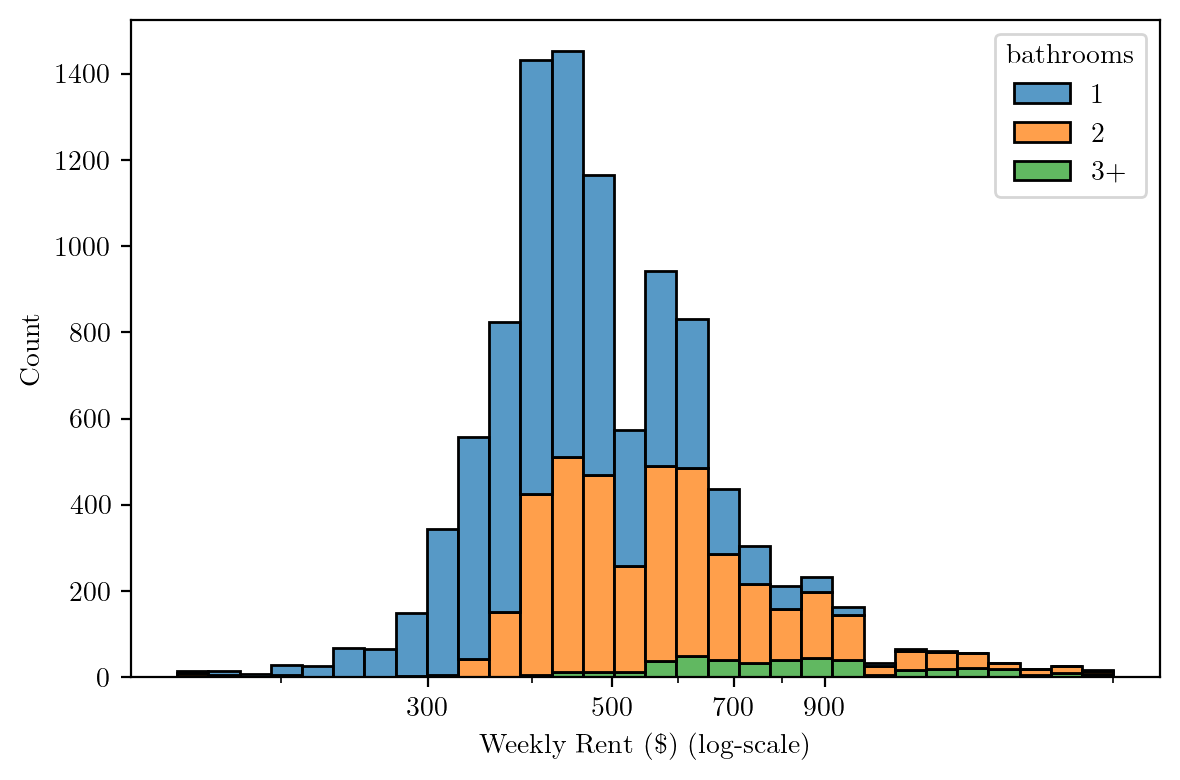

In [127]:
sns.histplot(df, x='price', hue='bathrooms', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bathrooms.png')

* Affordable properties almost never have more than 1 bathroom.
* Few properties have more than 2 bathrooms, those which do attract a premium.

* Townhouses attract a premium
* Units are more affordable

<AxesSubplot:xlabel='price', ylabel='Count'>

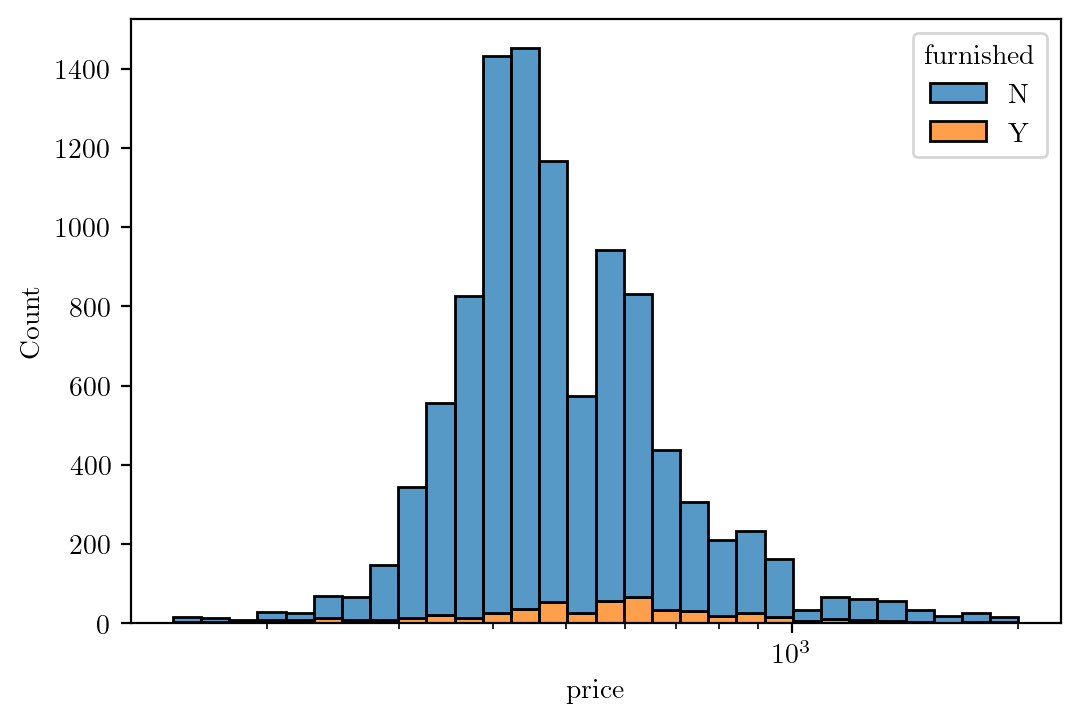

In [128]:
sns.histplot(data=df, x='price', hue='furnished', multiple='stack',
             bins=30, log_scale=True)

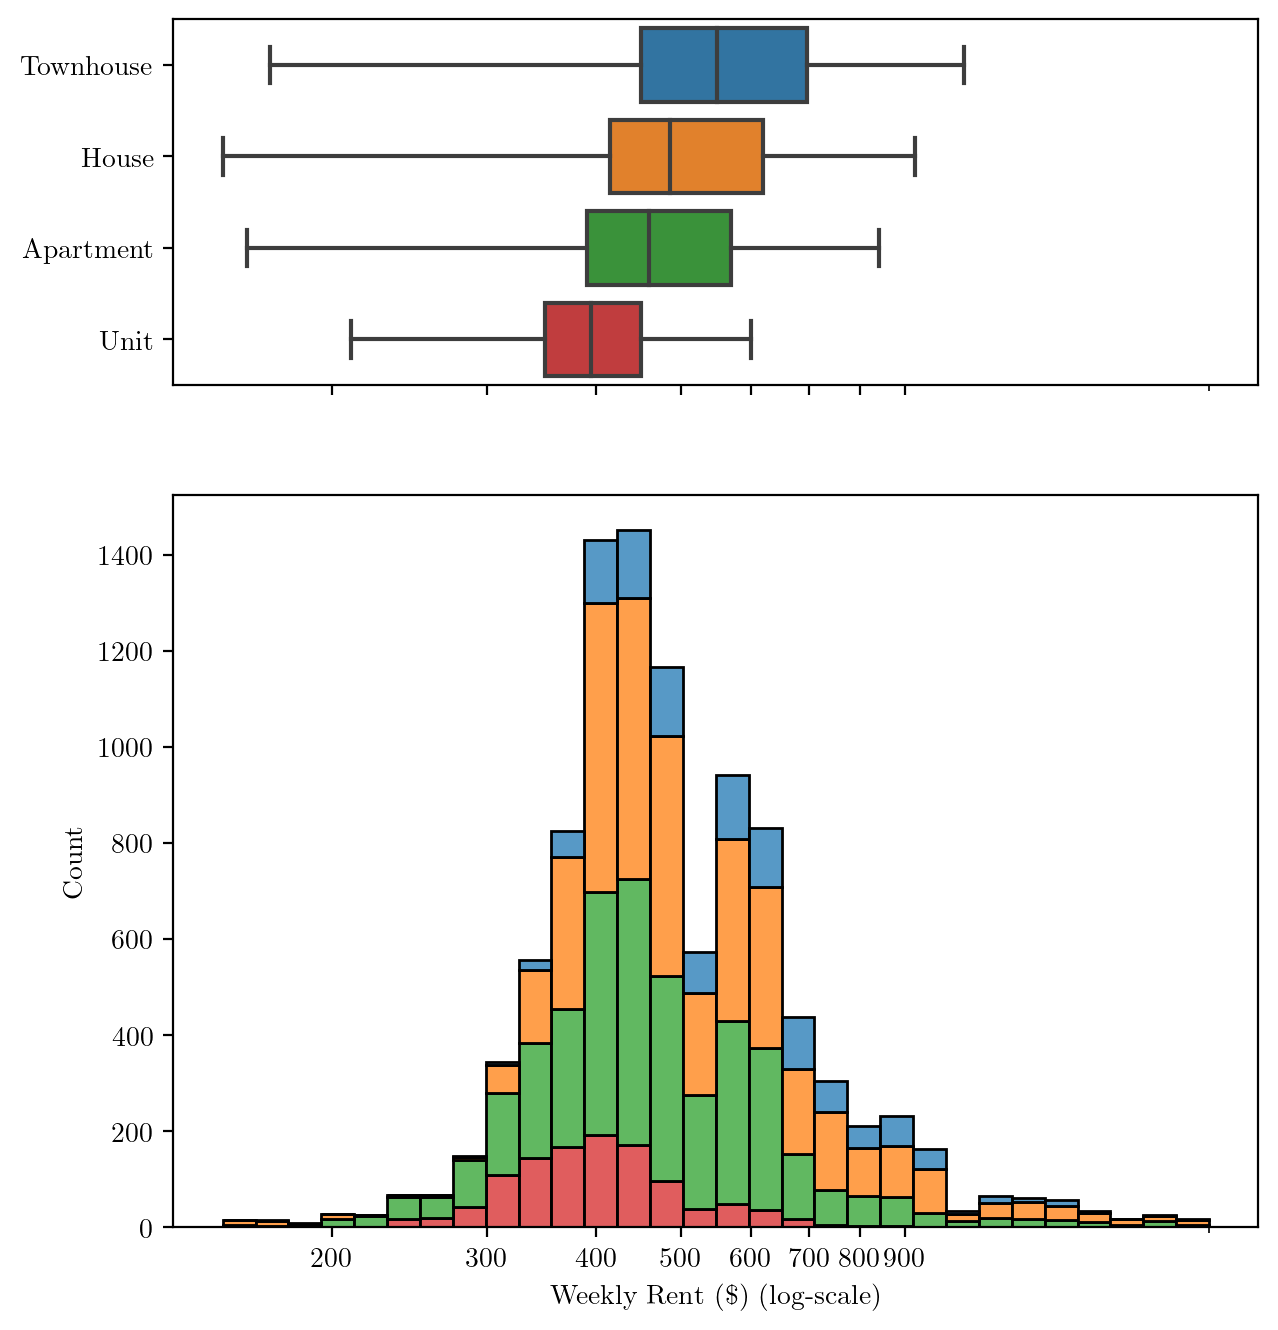

In [129]:
f, ((ax2, ax4)) = plt.subplots(2, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

sns.histplot(data=df, x='price', hue='propertyType', multiple='stack', hue_order=selected_property_types,
             bins=30, log_scale=True, ax=ax4, legend=False)

ax4.set_xlabel(r'Weekly Rent (\$) (log-scale)')
ax4.set_xticks([200, 300, 400, 500, 600, 700, 800, 900], labels=['200', '300', '400', '500', '600','700', '800', '900'])

sns.boxplot(data=df, x='price', y='propertyType', showfliers=False, order=selected_property_types, ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

f.savefig('../plots/property-type-boxplot-distplot')

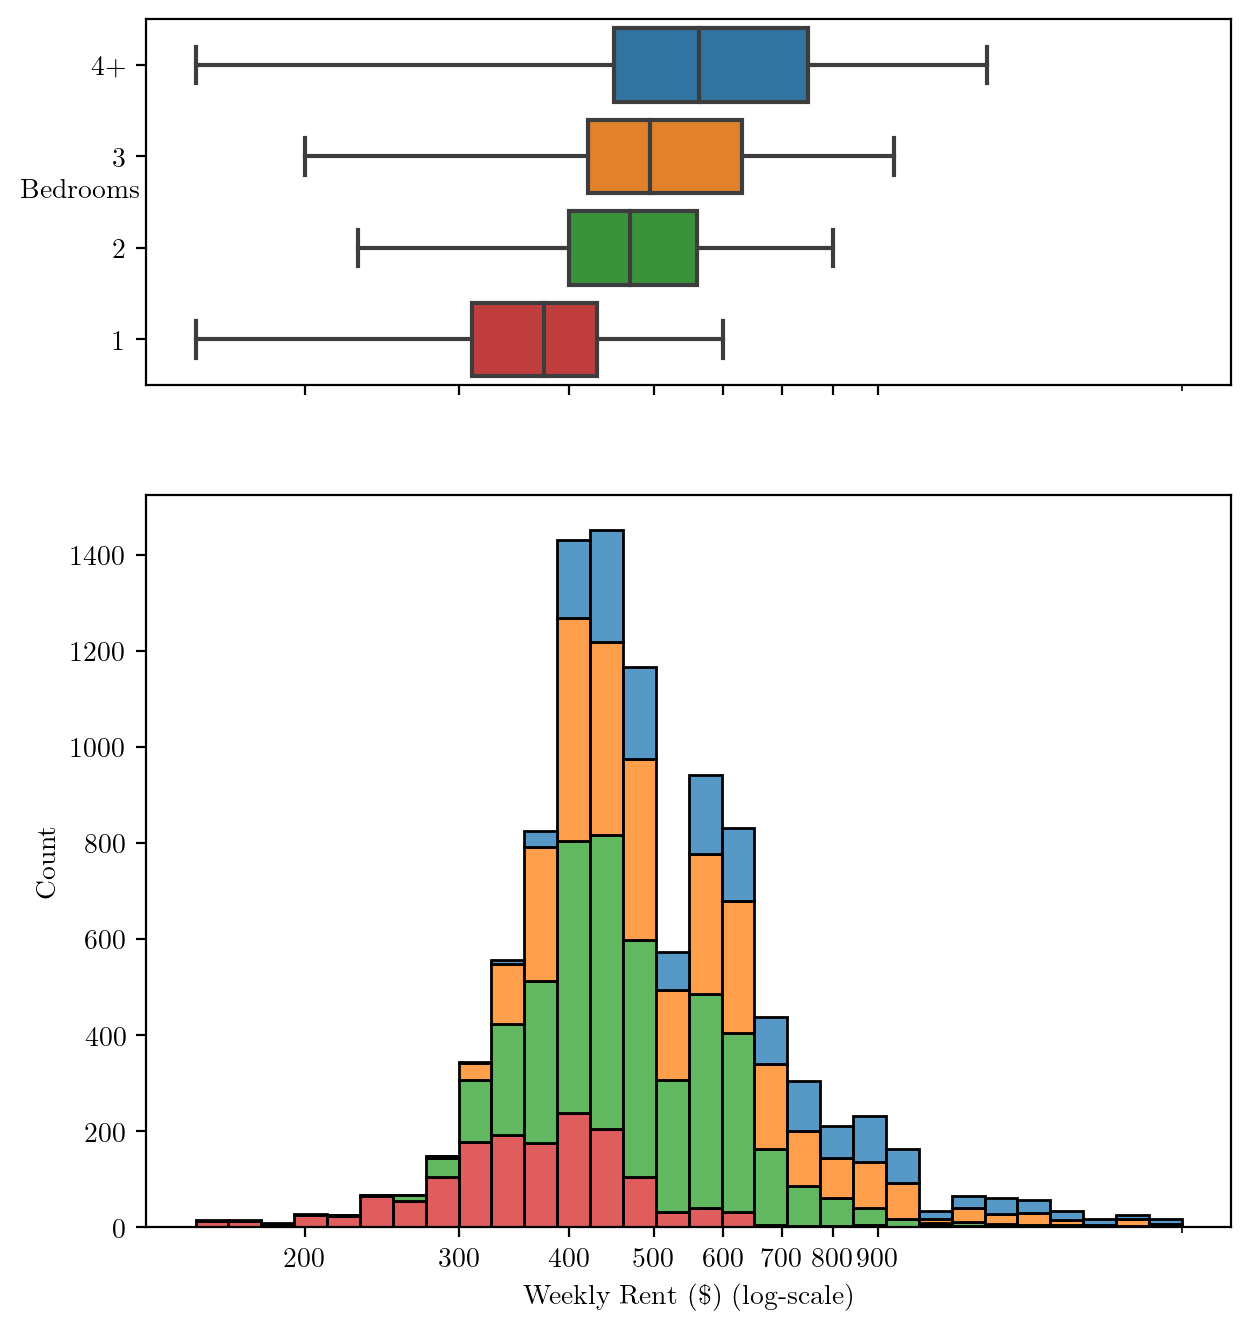

In [130]:
f, ((ax2, ax4)) = plt.subplots(2, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

bedroom_order = [1, 2, 3, '4+'][::-1]

sns.histplot(data=df, x='price', hue='bedrooms', multiple='stack', hue_order=bedroom_order,
             bins=30, log_scale=True, ax=ax4, legend=False)

ax4.set_xlabel(r'Weekly Rent (\$) (log-scale)')
ax4.set_xticks([200, 300, 400, 500, 600, 700, 800, 900], labels=['200', '300', '400', '500', '600','700', '800', '900'])

sns.boxplot(data=df, x='price', y='bedrooms', showfliers=False, order=bedroom_order, ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Bedrooms', rotation=0)

f.savefig('../plots/bedrooms-boxplot-distplot')

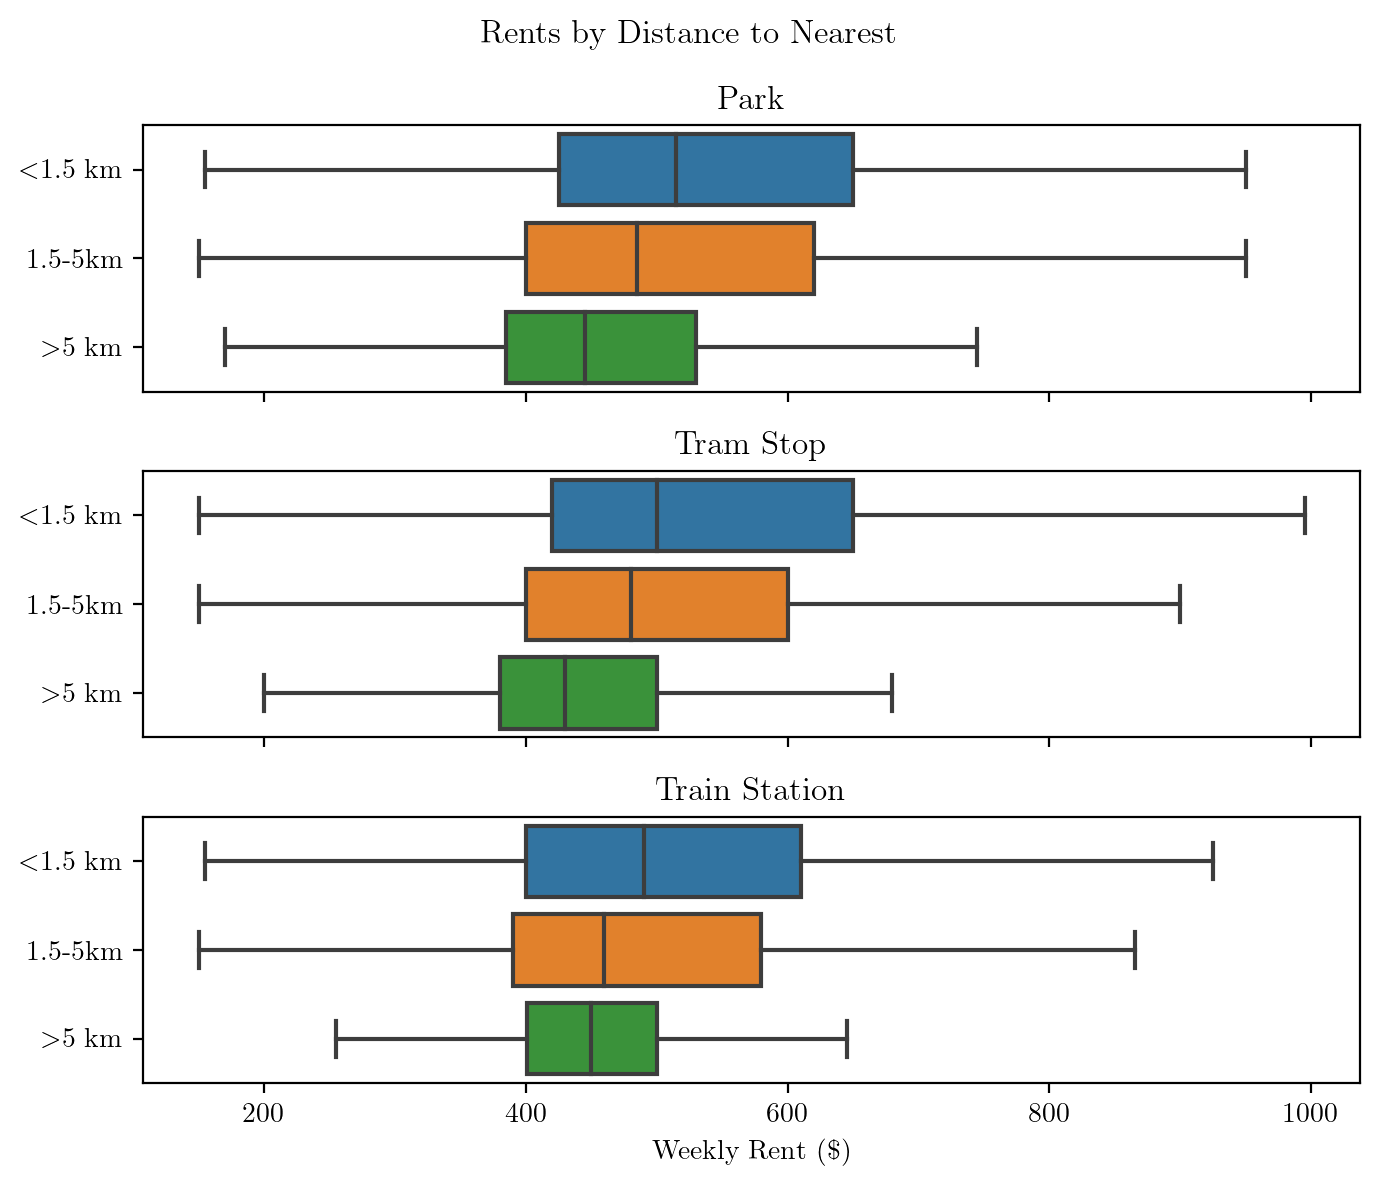

In [131]:
f, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(7, 6), sharex=True)

sns.boxplot(data=df, x='price', y='park_walkability', showfliers=False, ax=ax1)
sns.boxplot(data=df, x='price', y='is_tram_stop_walkable', showfliers=False, ax=ax2)
sns.boxplot(data=df, x='price', y='is_train_station_walkable', showfliers=False, ax=ax3)

ax1.set_title('Park')
ax2.set_title('Tram Stop')
ax3.set_title('Train Station')

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('')
    ax.set_ylabel('')

ax3.set_xlabel(r'Weekly Rent (\$)')

f.suptitle('Rents by Distance to Nearest')

plt.tight_layout()
plt.savefig('../plots/rent-by-walkability.png')

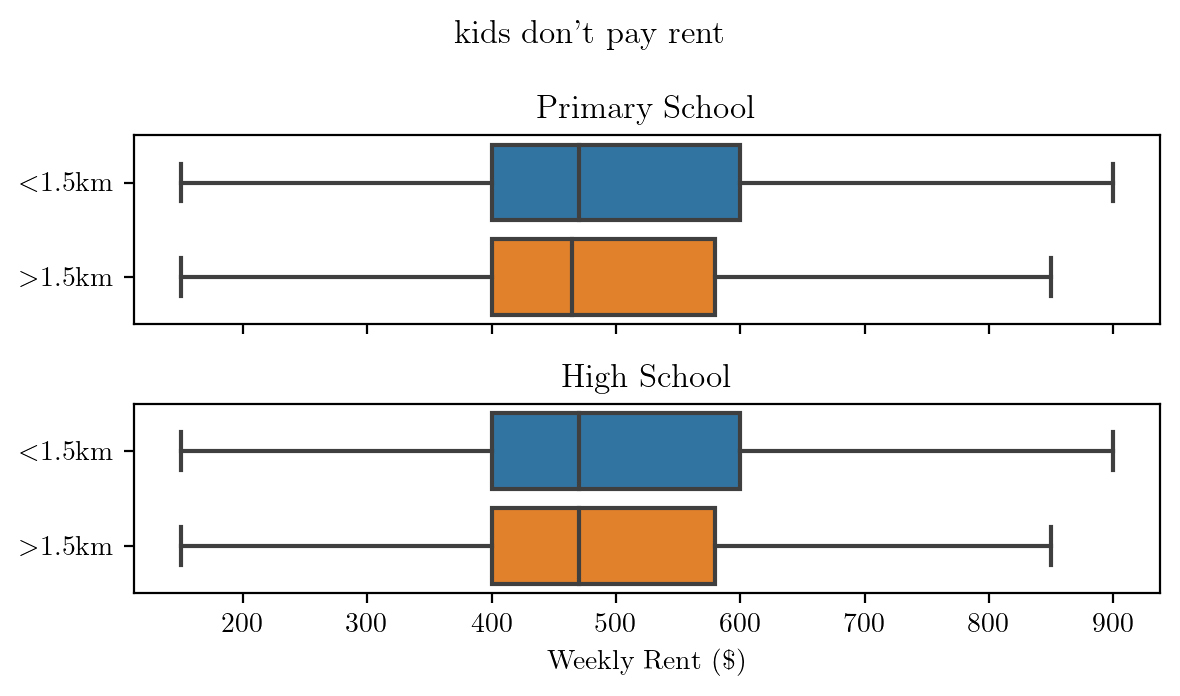

In [132]:
f, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(6, 3.5), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

yorder=df['is_primary_school_walkable'].unique()

sns.boxplot(data=df, x='price', y='is_primary_school_walkable', order=yorder, showfliers=False, ax=ax1)
sns.boxplot(data=df, x='price', y='is_secondary_school_walkable', order=yorder, showfliers=False, ax=ax2)

ax1.set_title('Primary School')
ax2.set_title('High School')

for ax in [ax1, ax2]:
    ax.set_xlabel('')
    ax.set_ylabel('')

ax2.set_xlabel(r'Weekly Rent (\$)')

f.suptitle('kids don\'t pay rent')

plt.tight_layout()

plt.savefig('../plots/rent-by-school-walkability.png')

In [133]:
df.columns

Index(['suburb', 'postcode', 'price', 'propertyType', 'bedrooms', 'bathrooms',
       'parkingSpaces', 'studies', 'furnished', 'closest_primary_distance',
       'closest_secondary_distance', 'closest_train_distance',
       'closest_tram_distance', 'cbd_distance', 'cbd_duration',
       'zlogCrimerate', 'closest_bus_distance', 'closest_park_distance',
       'min_pri_icsea', 'min_sec_icsea', 'log_closest_park_distance',
       'log_closest_tram_distance', 'log_closest_train_distance',
       'park_walkability', 'is_primary_school_walkable',
       'is_secondary_school_walkable', 'is_tram_stop_walkable',
       'is_train_station_walkable', 'city'],
      dtype='object')

In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

df.columns

df = df.dropna()

mdl = SelectKBest(mutual_info_regression, k=5).fit(df[[
         'closest_primary_distance', 'closest_secondary_distance',
         'closest_train_distance', 'closest_tram_distance',
         'cbd_distance', 'zlogCrimerate',
         'closest_bus_distance', 'closest_park_distance',
         'min_sec_icsea']], df['price'])

best_features = mdl.get_feature_names_out([
         'closest_primary_distance', 'closest_secondary_distance',
         'closest_train_distance', 'closest_tram_distance',
         'cbd_distance', 'zlogCrimerate',
         'closest_bus_distance', 'closest_park_distance',
         'min_sec_icsea'])

print(list(best_features)[::-1])

['min_sec_icsea', 'closest_park_distance', 'zlogCrimerate', 'cbd_distance', 'closest_tram_distance']


In [135]:
model = glm(formula="""price ~ bedrooms + bathrooms + log_closest_tram_distance 
                              + log_closest_park_distance + log_closest_train_distance """,
            families=families.Gaussian(link=families.links.log()),
            data=df)

model.fit().summary()

# Model interpretation:
#
# Effect of suburb properties on rental income
#
# Train station distance has no effect
# Properties close to tram stops are valued more
# Properties further from bus stops are valued more
# Properties close to parks are valued more
# Primary school ICSEA increases value alot

/home/lachstr/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                 8158
Model:                            GLM   Df Residuals:                     8149
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                          24316.
Method:                          IRLS   Log-Likelihood:                -52765.
Date:                Fri, 07 Oct 2022   Deviance:                   1.9815e+08
Time:                        22:21:14   Pearson chi2:                 1.98e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6021
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1368.7879     25.172     54.378      0.000    1319.452    1418.124
bedrooms[T.2]                116.0651      5.314     21.841      0.000     105.649     126.481
bedrooms[T.3]                229.1356      6.093     37.604      0.000     217.193     241.078
bedrooms[T.4+]               321.0729      7.900     40.641      0.000     305.589     336.557
bathrooms[T.2]               117.5728      4.151     28.326      0.000     109.437     125.708
bathrooms[T.3+]              317.6121      9.466     33.554      0.000     299.060     336.165
log_closest_tram_distance    -32.7977      1.132    -28.970      0.000     -35.017     -30.579
log_closest_park_distance    -68.0818      2.746    -24.792      0.000     -73.464     -62.699
log_closest_train_distance   -35.2668      2.104    -16.760      0.000     -39.391     -31.143
==============================================================================================
"""

In [136]:
df['price'].mean()

528.5053934787938

In [137]:
sum(abs(df['price'].mean()-df['price']))/len(df)

147.6542114037156

In [138]:
phat = model.fit().predict(df)
mae = sum(abs(phat - df['price']))/len(df)
mae

101.6879006027774

In [139]:

model = ols(formula="""price ~ closest_primary_distance + closest_secondary_distance""",
            data=df)

model.fit().summary()

# Model interpretation:
#
# Effect of suburb properties on rental income, a
#
# Primary school distance has no effect
# Properties closer to public secondary schools are valued more

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.242
Date:                Fri, 07 Oct 2022   Prob (F-statistic):             0.0144
Time:                        22:21:14   Log-Likelihood:                -55426.
No. Observations:                8158   AIC:                         1.109e+05
Df Residuals:                    8155   BIC:                         1.109e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    540.8579      5.411     99.962      0.000     530.252     551.464
closest_primary_distance      -0.0011      0.003     -0.358      0.720      -0.007       0.005
closest_secondary_distance    -0.0055      0.002     -2.670      0.008      -0.009      -0.001
==============================================================================
Omnibus:                     4280.136   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34848.619
Skew:                           2.401   Prob(JB):                         0.00
Kurtosis:                      11.914   Cond. No.                     6.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='zlogCrimerate', ylabel='logPrice'>

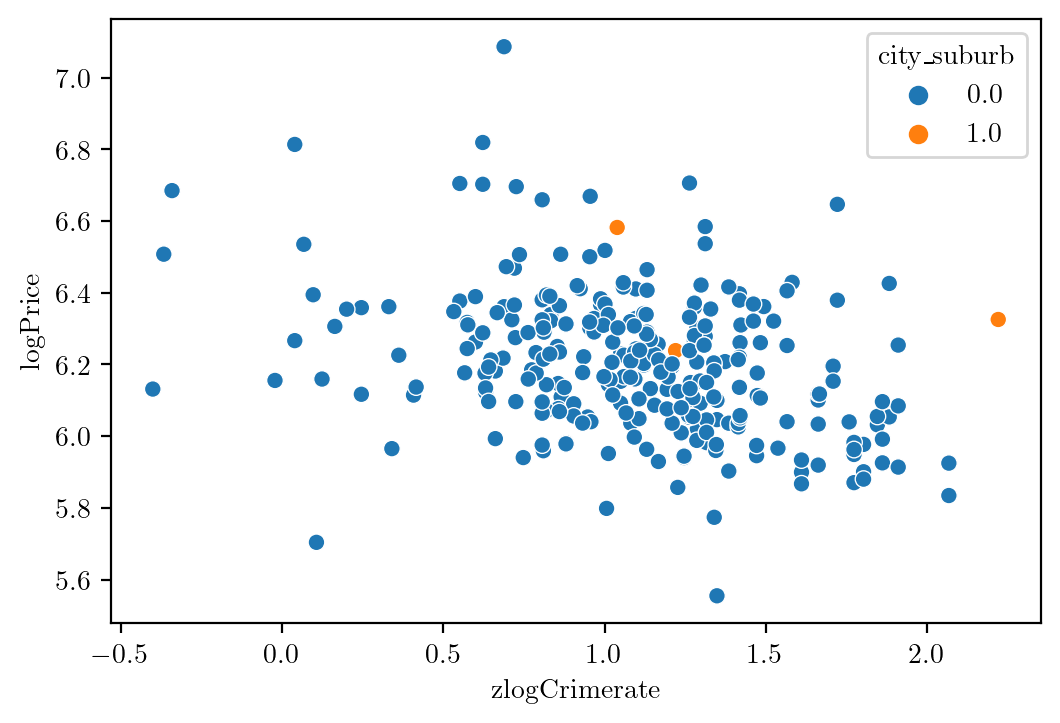

In [140]:

df['city_suburb'] = df['suburb'].apply(lambda s: s in ['Melbourne', 'East Melbourne', 'Carlton'])

df2 = df.dropna(subset='zlogCrimerate')
df2['logPrice'] = log(df2['price'])
df2 = df2.groupby(by=['suburb']).mean()

sns.scatterplot(data=df2, x='zlogCrimerate', y='logPrice', hue='city_suburb')

<AxesSubplot:xlabel='min_sec_icsea', ylabel='logPrice'>

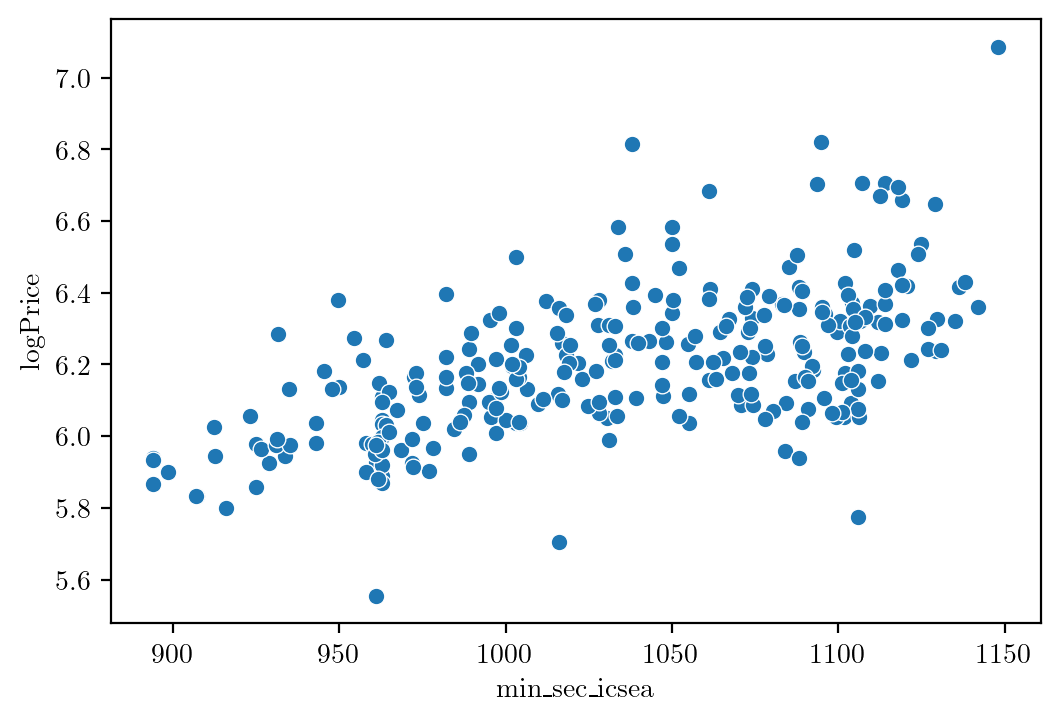

In [141]:
sns.scatterplot(data=df2, x='min_sec_icsea', y='logPrice')

<AxesSubplot:xlabel='closest_tram_distance', ylabel='logPrice'>

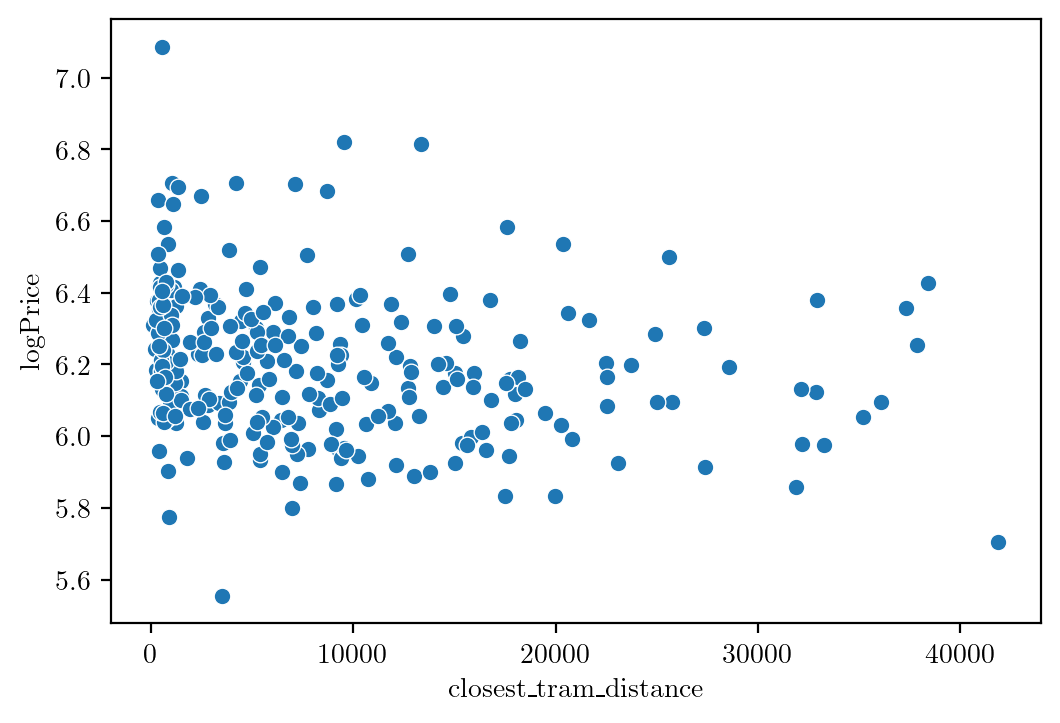

In [142]:
sns.scatterplot(data=df2, x='closest_tram_distance', y='logPrice')

In [143]:
model = glm(formula="""price ~ zlogCrimerate""",
            families=families.Gaussian(link=families.links.log()),
            data=df)

model.fit().summary()

/home/lachstr/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                 8158
Model:                            GLM   Df Residuals:                     8156
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          46185.
Method:                          IRLS   Log-Likelihood:                -55385.
Date:                Fri, 07 Oct 2022   Deviance:                   3.7669e+08
Time:                        22:21:15   Pearson chi2:                 3.77e+08
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01123
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       594.3300      7.257     81.892      0.000     580.106     608.554
zlogCrimerate   -49.7884      5.186     -9.601      0.000     -59.953     -39.624
=================================================================================
"""

In [144]:
df.loc[:, categorical_features] = df[categorical_features].astype(str)

In [145]:
df_test = df.sample(2000, random_state=7)

test_set = set(df_test.index)

df_train = df[~df.index.isin(test_set)]

In [146]:
df.columns

Index(['suburb', 'postcode', 'price', 'propertyType', 'bedrooms', 'bathrooms',
       'parkingSpaces', 'studies', 'furnished', 'closest_primary_distance',
       'closest_secondary_distance', 'closest_train_distance',
       'closest_tram_distance', 'cbd_distance', 'cbd_duration',
       'zlogCrimerate', 'closest_bus_distance', 'closest_park_distance',
       'min_pri_icsea', 'min_sec_icsea', 'log_closest_park_distance',
       'log_closest_tram_distance', 'log_closest_train_distance',
       'park_walkability', 'is_primary_school_walkable',
       'is_secondary_school_walkable', 'is_tram_stop_walkable',
       'is_train_station_walkable', 'city', 'city_suburb'],
      dtype='object')

In [147]:
df.dtypes

suburb                           object
postcode                          int64
price                             int64
propertyType                     object
bedrooms                         object
bathrooms                        object
parkingSpaces                    object
studies                          object
furnished                        object
closest_primary_distance        float64
closest_secondary_distance      float64
closest_train_distance          float64
closest_tram_distance           float64
cbd_distance                    float64
cbd_duration                    float64
zlogCrimerate                   float64
closest_bus_distance            float64
closest_park_distance           float64
min_pri_icsea                   float64
min_sec_icsea                   float64
log_closest_park_distance       float64
log_closest_tram_distance       float64
log_closest_train_distance      float64
park_walkability                 object
is_primary_school_walkable       object


In [159]:
binary_features = ['is_secondary_school_walkable',
                   'is_primary_school_walkable',
                   'city']

categorical_features = ['propertyType', 'bedrooms', 'bathrooms',
                        'parkingSpaces', 'studies', 'furnished']

continuous_features = ['closest_primary_distance',
       'closest_secondary_distance', 'closest_train_distance',
       'closest_tram_distance', 'cbd_distance', 'cbd_duration',
       'zlogCrimerate', 'closest_bus_distance', 'closest_park_distance',
       'min_pri_icsea', 'min_sec_icsea', 'log_closest_park_distance',
       'log_closest_tram_distance', 'log_closest_train_distance']

features = binary_features + categorical_features + continuous_features

X_train, X_test = df_train[features], df_test[features]
y_train, y_test = df_train['price'], df_test['price']

X_train

from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize

def encode(X):

    X_bin1 = label_binarize(X['is_secondary_school_walkable'], classes=[r'$<$1.5km', r'$>$1.5km'])
    X_bin2 = label_binarize(X['is_primary_school_walkable'], classes=[r'$<$1.5km', r'$>$1.5km'])
    X_bin3 = label_binarize(X['city'], classes=[True, False])

    categoricalEncoder = OneHotEncoder(sparse=False)

    X_cat = categoricalEncoder.fit_transform(X[categorical_features])

    continuousEncoder = StandardScaler()

    X_con = continuousEncoder.fit_transform(X[continuous_features])

    def labels():
        labels = []

        for name in binary_features:
            labels.append(name)

        for elem in categoricalEncoder.categories_:
            labels += list(elem)

        for name in continuousEncoder.feature_names_in_:
            labels.append(name)

        return labels

    X_encoded = np.hstack((X_bin1, X_bin2, X_bin3, X_cat, X_con))

    return X_encoded, labels()

X_train, columns = encode(X_train)
X_test, columns = encode(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

model = DecisionTreeRegressor(criterion='squared_error',
                              splitter='best',
                              min_samples_split = 400,
                              min_weight_fraction_leaf = 0.01,
                              max_depth=4).fit(X_train, y_train)

Rsquared = model.score(X_test, y_test)
Rsquared

yhat = model.predict(X_test)
mae = sum(abs(yhat - y_test))/len(y_test)
print(f'Mean abolute error of {mae:.2f}$/h for the Regression Tree on future test data.')
mse = sum((yhat - y_test)**2)/len(y_test)
print(f'Mean square error of {mse:.2f} ($/h)^2 for the Regression Tree on future test data.')

Mean abolute error of 95.38$/h for the Regression Tree on future test data.
Mean square error of 22593.63 ($/h)^2 for the Regression Tree on future test data.


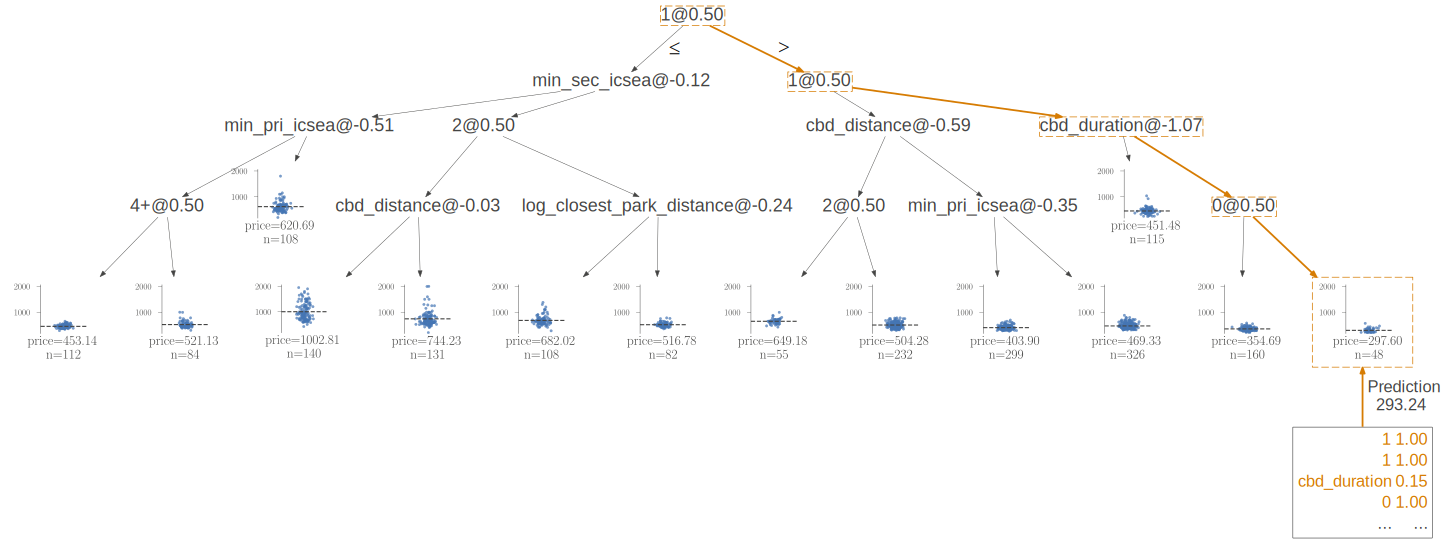

In [160]:
from dtreeviz.trees import dtreeviz

X_demo, y_demo = X_test[:2000], y_test[:2000]

tree = dtreeviz(model, X_demo, y_demo, columns, target_name='price', scale=1.5,
               fancy=False, orientation='TD', instance_orientation='TD',
               X=X_test[-1])

tree